In [1]:
# Bruno Ugolini
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

# Tennis points won

In the `tennis.csv` files of games played by Federer.

Does Federer score more total points than his opponent on average in a game?

In [2]:
df = pd.read_csv('data/tennis.csv')
df[['player1 total points won','player2 total points won']].agg('mean')


player1 total points won    86.869523
player2 total points won    73.917235
dtype: float64

# 2. College correlations

The `college.csv` filecontains a number of variables for 777 different universities and colleges in the US.

### 2.1

Use a scatterplot matrix to analyze the data and answer the following questions:

1. Which columns are possibly from a normal distribution? Statistically test if this is the case (you'll find a function for it in `scipy.stats`). For each explain if it is or not normally distributed.

2. Of the columns that aren't normally distributed, name which distribution could possibly fit them? (Use your research skills)

3. Give 3 pairs of columns that are highly correlated? Give their correlation coefficients.

4. Give 3 column pairs that are not correlated? Give their correlation coefficients.

In [3]:
df = pd.read_csv('data/college.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

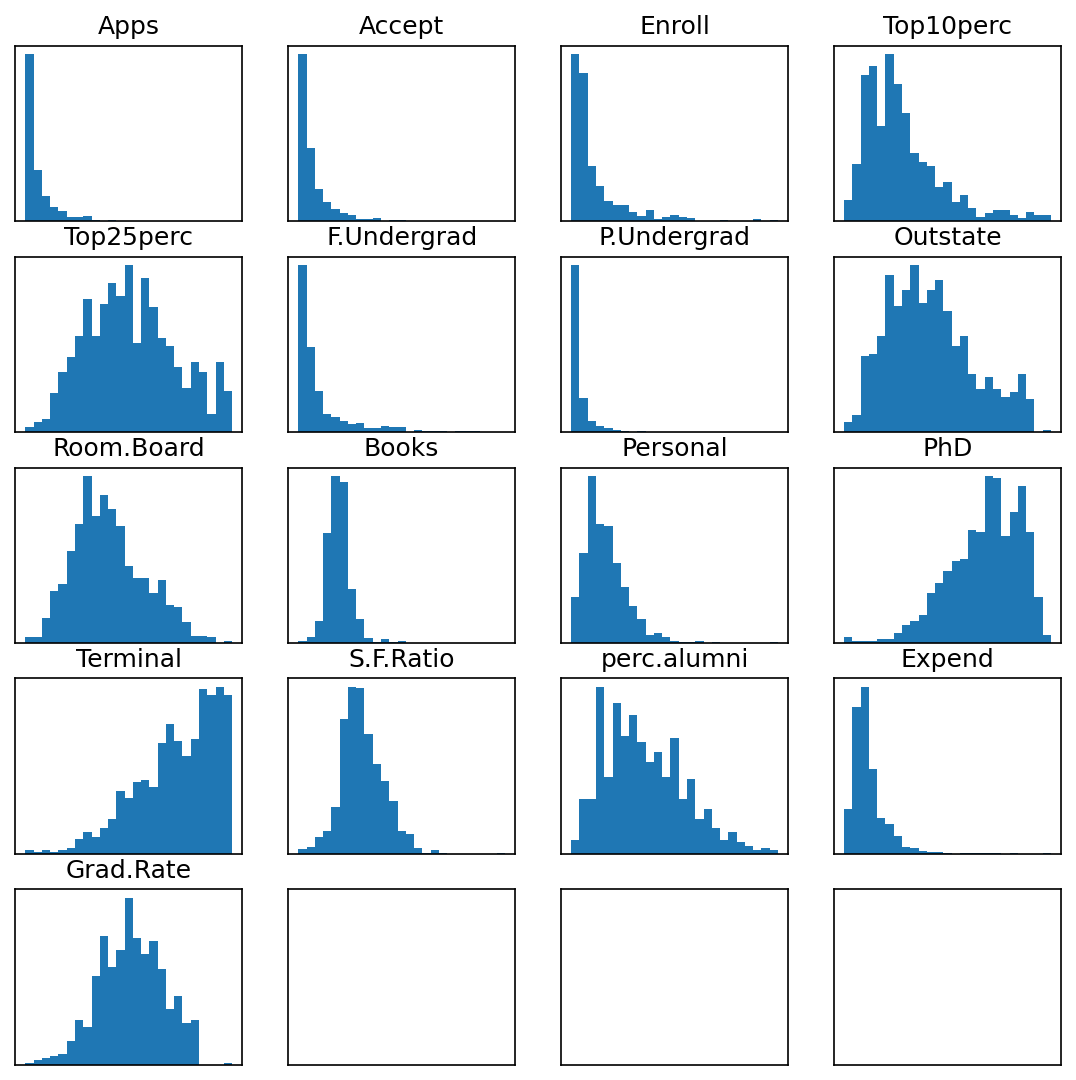

In [6]:
#==============================
# Question 1: 
# Which columns are possibly 
# from a normal # distribution?
#==============================

# start by visual inspection of the data
name_cols = df.select_dtypes(['int64', 'float64']).columns
rows=5
cols=4

fig, ax = plt.subplots(rows, cols, dpi=150, figsize=(9,9))

cnt = 0
for i in range(rows):
    for j in range(cols):
        if cnt >= len(name_cols):
            ax[i,j].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
            ax[i,j].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
            pass
        else:
            nm = name_cols[cnt]
            ax[i,j].hist(df[nm], bins= 25)
            ax[i,j].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
            ax[i,j].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
            ax[i,j].set_title(nm)
        cnt += 1


In [18]:
# liberally select some candidates for testing
to_check = ['Top10perc', 'Top25perc', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
from scipy.stats import normaltest

In [11]:
# select a 2-sided 5% confidence level
alpha =  0.05

print(f"Testing for a normal distribution to a {alpha*100}% tolerance")
cnt = 0
for col in to_check:
    k2, p = normaltest(df[col], nan_policy='omit')
    print(f"Column name: {col}")
    print(f"\tp value: {p:g}")
    if p < alpha:
        print(f"\t{col} is not a normal distribution\n")
    else:
        print(f"\t{col} is a normal distribution\n")
    cnt += 1

Testing for a normal distribution to a 5.0% tolerance
Column name: Top10perc
	p value: 1.6846e-43
	Top10perc is not a normal distribution

Column name: Top25perc
	p value: 5.66349e-07
	Top25perc is not a normal distribution

Column name: Outstate
	p value: 3.22605e-09
	Outstate is not a normal distribution

Column name: Room.Board
	p value: 6.94933e-07
	Room.Board is not a normal distribution

Column name: Books
	p value: 4.39666e-142
	Books is not a normal distribution

Column name: Personal
	p value: 4.06821e-70
	Personal is not a normal distribution

Column name: PhD
	p value: 9.73947e-16
	PhD is not a normal distribution

Column name: Terminal
	p value: 5.42653e-16
	Terminal is not a normal distribution

Column name: S.F.Ratio
	p value: 2.12475e-22
	S.F.Ratio is not a normal distribution

Column name: perc.alumni
	p value: 8.04858e-10
	perc.alumni is not a normal distribution

Column name: Expend
	p value: 6.72048e-134
	Expend is not a normal distribution

Column name: Grad.Rate
	p

Q1 Answer: Only Grad.Rate is a normal distribution to a 5% confidence level. While many column data may look to be normally distribution they have significant numbers of outliers that make them non-normal.

In [ ]:
#=====================================
# Question 2: 
# Of the columns that aren't normally
# distributed, name which distribution 
# could possibly fit them?
#=====================================

In [19]:
# remove Grad.Rate from list
del to_check[11]
from matplotlib import gridspec
import scipy.stats as stats

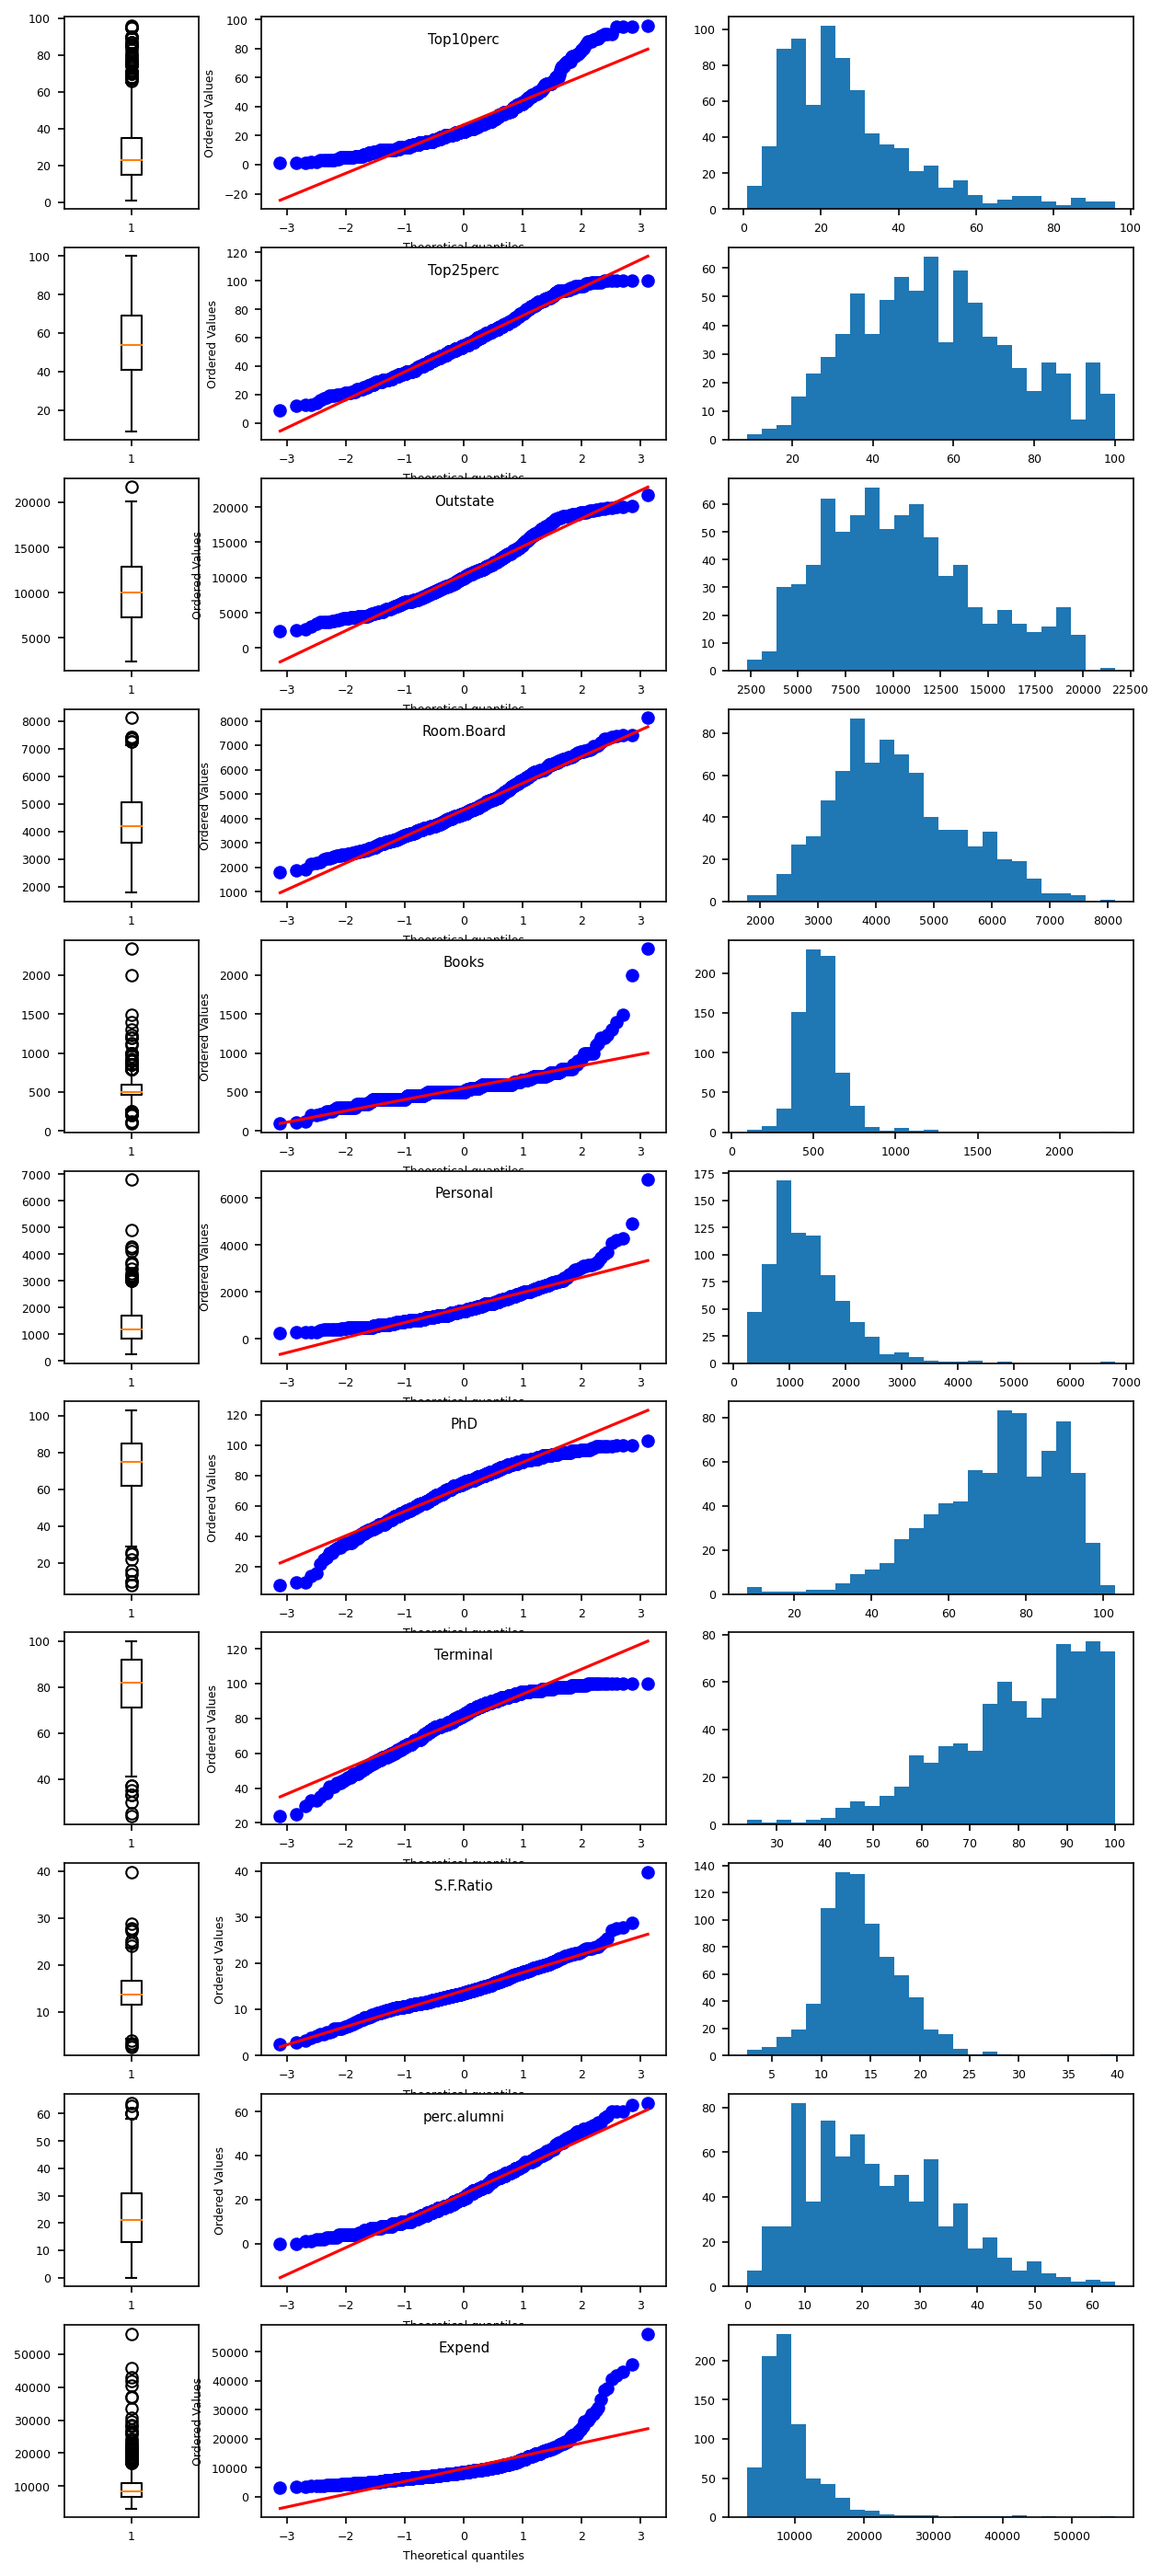

In [21]:
gs = gridspec.GridSpec(11, 3, width_ratios=[1, 3, 3])
cnt = 0
fig, ax = plt.subplots(11, 3, dpi=150, figsize=(10,24))
plt.rcParams.update({'font.size': 6})
for col in to_check:
    i = cnt // 3
    j = cnt % 3
    # draw a boxplot for each candidate
    ax[i, j] = plt.subplot(gs[i,j])
    ax[i, j].boxplot(df[col]);
#    ax[i, j].set_title(col,x=0.75,y=0.8)
    # draw a qq chart for each candidate
    j += 1
    ax[i, j] = plt.subplot(gs[i,j])
    stats.probplot(df[col], dist="norm",plot=ax[i, j]);
    ax[i, j].set_title(col,x=0.5,y=0.8)
    # draw a histogram for each
    j += 1
    ax[i, j] = plt.subplot(gs[i,j])
    ax[i,j].hist(df[col], bins= 25)
#    ax[i,j].set_title(col,x=0.75,y=0.8)
    cnt += 3

In [22]:
# Based on the above and looking at the following for guidance:
# https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9
# we can state:

Top10perc, Top25perc, Outstate : these appear to be bi-modal distributions (addition of separate normal distributions).

Room.Board, perc.alumni : these appear to be right-skew distributions

Books, Personal, Expend : these are heavy-tailed distributions

PhD : is left-skewed and bi-modal

Terminal : is left-skewed distributions

S.F.Ratio : is light-tailed

In [26]:
(df.corr()[(abs(df.corr()) > 0.75) & 
           (df.corr() != 1)]
           .dropna(axis=1,how='all')
)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,PhD,Terminal
Apps,NaN,0.943451,0.846822,NaN,NaN,0.814491,NaN,NaN
Accept,0.943451,NaN,0.911637,NaN,NaN,0.874223,NaN,NaN
Enroll,0.846822,0.911637,NaN,NaN,NaN,0.964640,NaN,NaN
Top10perc,NaN,NaN,NaN,NaN,0.891995,NaN,NaN,NaN
Top25perc,NaN,NaN,NaN,0.891995,NaN,NaN,NaN,NaN
F.Undergrad,0.814491,0.874223,0.964640,NaN,NaN,NaN,NaN,NaN
P.Undergrad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outstate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Room.Board,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Books,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Answer: highest correlations are for :
###         Accept and Apps with corr = 0.943451
###         Enroll and Accept with corr = 0.846822
###         F.Undergrad and Enroll with corr = 0.964640

In [31]:
(df.corr()[(abs(df.corr()) < 0.03) & 
           (df.corr() != 1)]
           .dropna(axis=1,how='all')
)

,Accept,Enroll,F.Undergrad,Outstate,Books,Personal,PhD,Expend,Grad.Rate
Apps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accept,NaN,NaN,NaN,-0.025755,NaN,NaN,NaN,NaN,NaN
Enroll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.022341
Top10perc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top25perc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F.Undergrad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018652,NaN
P.Undergrad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outstate,-0.025755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Room.Board,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Books,NaN,NaN,NaN,NaN,NaN,NaN,0.026906,NaN,0.001061


In [33]:
# lowest coorelations are for:
#    PhD and Personal with corr = -0.010936
#    Grad.Rate and Books with corr = 0.001061	
#    Expend and F.Undergrad with corr = 0.018652

### 2.2 Boxplot

Make a boxplot of private vs outstate colleges. It should look like:

![](boxplort.png)

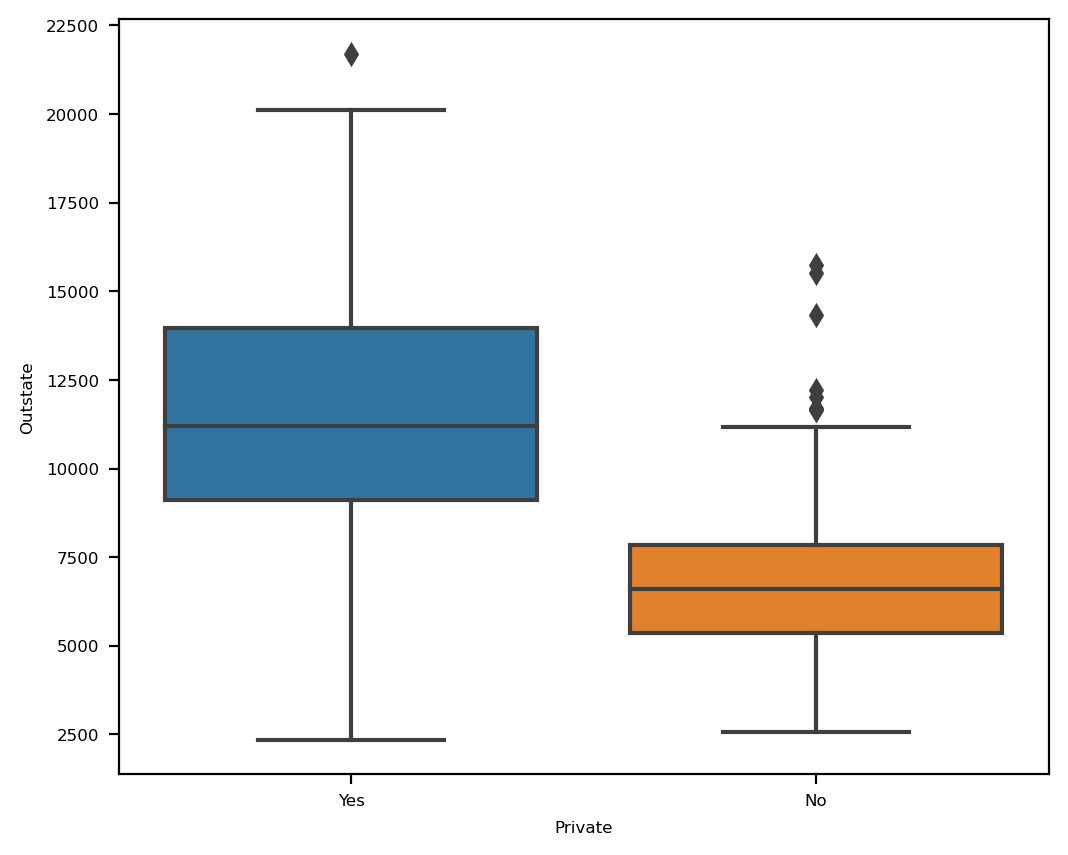

In [38]:
fig = plt.figure(dpi=200, figsize=(6,5))
sns.boxplot(data=df, x='Private', y='Outstate')

# 3. Auto data

The `auto.csv` data file is malformed.

Fix it (using only python) so that it can be read into pandas, and then give a scatterplot matrix of horsepower, weight, year and mpg.

Did cars get more efficient over time? Make an argument on this question.

In [41]:
import re
data_file = open('data/auto.csv', 'r')
with open('data/auto_corrected.csv', 'w') as f:
    for i, line in enumerate(data_file):
        if i == 0:
            line = re.sub(r'\s',',',line,count=4)
            line = re.sub(r'\t',',',line)
            f.write(f"{line}\n")
        elif i == 1:
            pass
        else:
            line = re.sub(r'(?<=[0-9.0-9])\s+(?=["])',',',line)
            line = re.sub(r'(?<=[0-9.0-9\?])\s+(?=[\?0-9.0-9])',',',line)
            line = re.sub('\?','NaN',line)
            f.write(line)
df = pd.read_csv('data/auto_corrected.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.0+ KB


<Figure size 2200x2200 with 0 Axes>

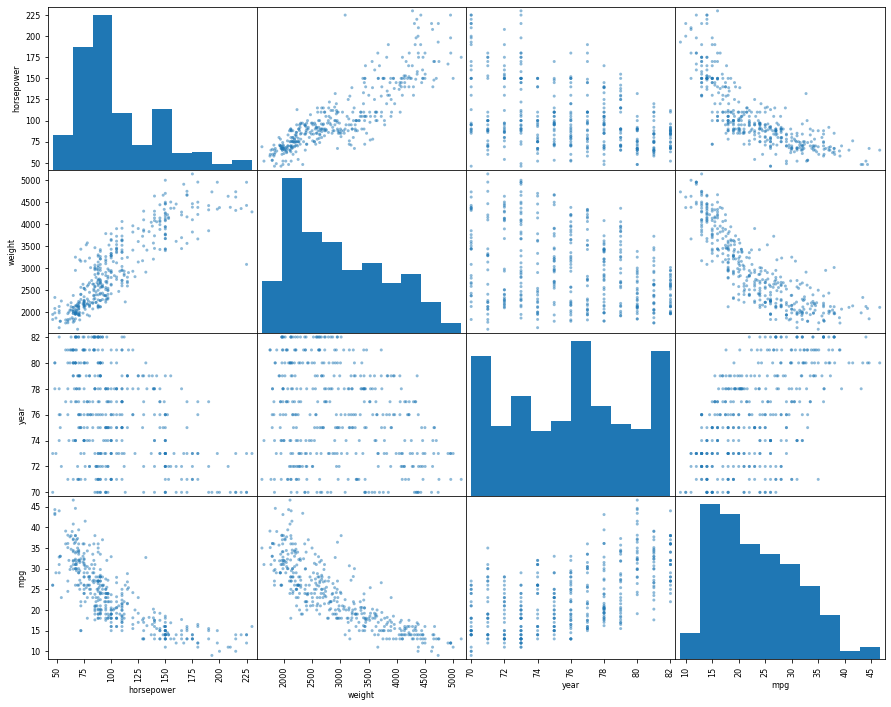

In [47]:
df = df.dropna(axis=0)
fig = plt.figure(dpi=200, figsize=(11,11))
plt.rcParams.update({'font.size': 8})
pd.plotting.scatter_matrix(df[['horsepower', 'weight', 'year', 'mpg']],figsize=(15,12));

Answer:
There is a linear relationship between horsepower and weight (row 1, column 2).
There is an inverse relationship between mpg and weight (row 4, column 2).
During this timeframe, cars achieved better efficiency by exploiting these relationships and thus decreasing weight (row 2, column 3) achieved better fuel economy (row 4, column 3).

### 3.2 Auto Statistics

What is the mean, median and standard deviation of each quantitative feature?


In [54]:
(df.describe()
   .iloc[[1,2,5]]
   .transpose()
)
# Note that '50%' is the median

,mean,std,50%
mpg,23.445918,7.805007,22.75
cylinders,5.471939,1.705783,4.00
displacement,194.411990,104.644004,151.00
horsepower,104.469388,38.491160,93.50
weight,2977.584184,849.402560,2803.50
acceleration,15.541327,2.758864,15.50
year,75.979592,3.683737,76.00
origin,1.576531,0.805518,1.00


### 3.3 data removal

Remove the 10th through 85th observations. 

Does the mean statistically significantly change for each of the columns?



In [55]:
# drop the rows
indx_to_drop = [i for i in range(9,85)]
df2 =df.drop(df.index[indx_to_drop])
# get the quantitative column names
cols = df2.describe().columns
# calculate the t-test for both means one by one

import scipy as sc
alpha =  0.05
print(f"Testing for common mean to a {alpha*100}% tolerance")
for col in cols:
    k, p = sc.stats.ttest_ind(df[col], df2[col])
    print(f"Column name: {col}")
    print(f"\tt-test value: {p:g}")
    if p < alpha:
        print(f"\tThe means for {col} have statistically changed.\n")
    else:
        print(f"\tThe means for {col} have not statistically changed.\n")


Testing for common mean to a 5.0% tolerance
Column name: mpg
	t-test value: 0.105974
	The means for mpg have not statistically changed.

Column name: cylinders
	t-test value: 0.438994
	The means for cylinders have not statistically changed.

Column name: displacement
	t-test value: 0.35485
	The means for displacement have not statistically changed.

Column name: horsepower
	t-test value: 0.183968
	The means for horsepower have not statistically changed.

Column name: weight
	t-test value: 0.508781
	The means for weight have not statistically changed.

Column name: acceleration
	t-test value: 0.368891
	The means for acceleration have not statistically changed.

Column name: year
	t-test value: 8.47552e-06
	The means for year have statistically changed.

Column name: origin
	t-test value: 0.687111
	The means for origin have not statistically changed.



# 4. Boston housing dataset

You can use `from sklearn.datasets import load_boston` to load the boston housing dataset.

The `load_boston()['DESCR']` will describe columns for you.

Are any of the columns associated with per capita crime rate? If so, show the numeric relationship and give a possible explanation for highly correlated/negatively correlated features

### 4.2 Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?




### 4.3 How many of the suburbs in this data set bound the Charles river?

### 4.4 What is the median pupil-teacher ratio among the towns in this data set?

### 4.5 Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.



### 4.6 In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.


